# Importing needed libraries

In [150]:
import pandas as pd
import numpy as np
import sys
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Reading data set and adding additional features

Then performing principal component analysis for each dataset

1) Training set

In [151]:
data_train = pd.read_csv('../../1. Task and Data/train.csv',sep='|')

In [152]:
data_train['totalScanTimeInMinutes'] = data_train['totalScanTimeInSeconds'] / 60.0
data_train['scannedLineItems'] = data_train['scannedLineItemsPerSecond'] * data_train['totalScanTimeInSeconds']
data_train['pricePerScannedLineItem'] = data_train['grandTotal'] / data_train['scannedLineItems']
data_train['scansWithoutRegistrationPerScannedLineItem'] = data_train['scansWithoutRegistration'] / data_train['scannedLineItems']
data_train['quantityModificationsPerScannedLineItem'] = data_train['quantityModifications'] / data_train['scannedLineItems']
data_train['lineItemVoidsPerSecond'] = data_train['lineItemVoids'] / data_train['totalScanTimeInSeconds']
data_train['scansWithoutRegistrationPerSecond'] = data_train['scansWithoutRegistration'] / data_train['totalScanTimeInSeconds']
data_train['quantityModificationsPerSecond'] = data_train['quantityModifications'] / data_train['totalScanTimeInSeconds']
data_train['secondsPerEuro'] = data_train['totalScanTimeInSeconds'] / data_train['grandTotal']
data_train['lineItemVoidsPerEuro'] = data_train['lineItemVoids'] / data_train['grandTotal']
data_train['scansWithoutRegistrationPerEuro'] = data_train['scansWithoutRegistration'] / data_train['grandTotal']
data_train['quantityModificationsPerEuro'] = data_train['quantityModifications'] / data_train['grandTotal']

In [153]:
#Perform PCA on training set
y = data_train['fraud']
x = data_train.drop('fraud',axis=1)
# feature extraction
pca = PCA(n_components=3)

fit = pca.fit(x)

print("Principal Components:")   
print(fit.components_)

print("Explained Variance:") 
print(fit.explained_variance_ratio_)

Principal Components:
[[ 1.69836765e-05  4.94279851e-03 -5.68437765e-04  2.90736664e-05
   1.72466623e-05 -2.02067364e-05 -5.83309384e-07 -2.53372105e-06
   1.99624126e-06  8.23799752e-05 -3.16663395e-05 -7.92848758e-05
   5.66477382e-07 -3.19447746e-06 -2.05142807e-07 -1.95332705e-07
  -1.20118214e-07  9.99950027e-01  6.78575640e-03  5.39639953e-03
   6.97704479e-05]
 [-7.79188519e-05 -9.99848342e-01 -5.38209628e-05 -1.18053661e-04
  -5.00672397e-05  3.22371458e-05  1.38161085e-04  4.88303250e-04
   2.95686197e-05 -1.66641390e-02 -1.67481821e-04  4.30930454e-04
   4.84600388e-05  3.54659600e-05  5.52959996e-05  4.99883583e-05
   2.56150733e-05  4.93638201e-03  7.00757346e-04  4.68676694e-04
   1.13734210e-04]
 [ 2.90566217e-03  2.18461590e-05  9.86482268e-01  7.59863929e-04
  -3.07059059e-03 -5.65596625e-04 -1.59725671e-04  3.22995273e-03
   1.62238667e-03  3.64102649e-07 -1.46779698e-02  1.62910002e-01
   2.13059450e-03  9.08753108e-04 -2.00075020e-05 -1.27381137e-04
   6.98691845e-0

2) Test set

In [154]:
data_test = pd.read_csv("test.csv", sep="|")

In [155]:
data_test['totalScanTimeInMinutes'] = data_test['totalScanTimeInSeconds'] / 60.0
data_test['scannedLineItems'] = data_test['scannedLineItemsPerSecond'] * data_test['totalScanTimeInSeconds']
data_test['pricePerScannedLineItem'] = data_test['grandTotal'] / data_test['scannedLineItems']
data_test['scansWithoutRegistrationPerScannedLineItem'] = data_test['scansWithoutRegistration'] / data_test['scannedLineItems']
data_test['quantityModificationsPerScannedLineItem'] = data_test['quantityModifications'] / data_test['scannedLineItems']
data_test['lineItemVoidsPerSecond'] = data_test['lineItemVoids'] / data_test['totalScanTimeInSeconds']
data_test['scansWithoutRegistrationPerSecond'] = data_test['scansWithoutRegistration'] / data_test['totalScanTimeInSeconds']
data_test['quantityModificationsPerSecond'] = data_test['quantityModifications'] / data_test['totalScanTimeInSeconds']
data_test['secondsPerEuro'] = data_test['totalScanTimeInSeconds'] / data_test['grandTotal']
data_test['lineItemVoidsPerEuro'] = data_test['lineItemVoids'] / data_test['grandTotal']
data_test['scansWithoutRegistrationPerEuro'] = data_test['scansWithoutRegistration'] / data_test['grandTotal']
data_test['quantityModificationsPerEuro'] = data_test['quantityModifications'] / data_test['grandTotal']

In the test data set we have NaN values and infinity values, which PCA cannot handle so we need to drop these problematic instances.

In [156]:
data_test.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,totalScanTimeInMinutes,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,...,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,4.981210e+05,4.981080e+05,4.981150e+05,4.981070e+05
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190,15.260146,...,6.693747,0.669799,0.336203,0.024370,0.021893,0.010991,inf,inf,inf,inf
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235,8.812881,...,11.680538,1.208735,0.627875,0.193313,0.171088,0.088685,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.002908e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000,7.633333,...,1.611200,0.142857,0.062500,0.002735,0.002431,0.001082,9.166667e+00,5.006258e-02,4.447409e-02,1.990446e-02
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941,15.266667,...,3.224706,0.333333,0.160000,0.006002,0.005474,0.002729,1.833183e+01,1.099959e-01,1.002339e-01,5.002501e-02
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308,22.900000,...,6.272500,0.636364,0.333333,0.012000,0.010959,0.005464,3.656578e+01,2.198608e-01,2.002002e-01,9.996002e-02
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,30.516667,...,99.990000,10.000000,5.000000,11.000000,10.000000,5.000000,inf,inf,inf,inf


In [157]:
data_test.shape

(498121, 21)

In [158]:
data_test.loc[data_test['grandTotal'] == 0.00, 'secondsPerEuro'] = data_test['totalScanTimeInSeconds'] / 0.01
data_test.loc[data_test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = data_test['lineItemVoids'] / 0.01
data_test.loc[data_test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = data_test['scansWithoutRegistration'] / 0.01
data_test.loc[data_test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = data_test['quantityModifications'] / 0.01

In [159]:
#Dropping all rows with NaN and infinity values
#data_test = data_test.replace([np.inf, -np.inf], np.nan)
#datat_test = data_test.dropna(axis=0, how='any')

Somehow it doesn't drop the whole row but just the values in the column having the NaN Value. However the documentation states it is dropping the whole row.. Any ideas?

In [160]:
#Testing dropping
data_test.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,totalScanTimeInMinutes,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,...,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190,15.260146,...,6.693747,0.669799,0.336203,0.024370,0.021893,0.010991,104.620508,0.637226,0.557118,0.282206
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235,8.812881,...,11.680538,1.208735,0.627875,0.193313,0.171088,0.088685,1866.157715,11.922663,9.897615,5.063211
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010029,0.000000,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000,7.633333,...,1.611200,0.142857,0.062500,0.002735,0.002431,0.001082,9.166667,0.050058,0.044474,0.019897
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941,15.266667,...,3.224706,0.333333,0.160000,0.006002,0.005474,0.002729,18.331833,0.109987,0.100231,0.050025
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308,22.900000,...,6.272500,0.636364,0.333333,0.012000,0.010959,0.005464,36.565781,0.219841,0.200200,0.099960
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,30.516667,...,99.990000,10.000000,5.000000,11.000000,10.000000,5.000000,183100.000000,1100.000000,1000.000000,500.000000


In [161]:
data_test.shape

(498121, 21)

In [162]:
#Perform PCA on test set
# y = data_test['fraud']
# x = data_test.drop('fraud',axis=1)

#Fraud label is not relevant for test set

# feature extraction
pca = PCA(n_components=7)

fit = pca.fit(data_test)

print("Principal Components:")   
print(fit.components_)

print("Explained Variance:") 
print(fit.explained_variance_ratio_)

Principal Components:
[[ 8.55830302e-07  9.86566648e-03 -1.23905132e-03  4.33749459e-06
  -3.59737822e-06 -1.92504942e-07 -1.66501515e-06 -6.82267711e-06
  -4.62987057e-07  1.64427775e-04  1.10084539e-06 -1.65881269e-04
  -1.33083208e-06  1.22089606e-07 -5.96644584e-07 -5.40243529e-07
  -2.70532880e-07  9.99929156e-01  4.90928252e-03  3.86591733e-03
   1.92738191e-03]
 [ 1.05005518e-07  9.99812038e-01  6.68176916e-05 -4.57529268e-06
  -4.86647092e-06 -1.92464027e-06 -1.67436913e-04 -5.48521913e-04
  -3.77988234e-08  1.66635340e-02 -1.15725864e-05  2.91919900e-05
   4.03802397e-08 -5.17950791e-07 -6.01364379e-05 -5.37960113e-05
  -2.70491194e-05 -9.86204725e-03 -5.80292754e-04 -4.73502630e-04
  -2.28589830e-04]
 [-3.51311360e-05 -6.38134107e-05  9.87737379e-01  1.06488954e-04
   1.82754736e-04  2.84046374e-05 -3.84947015e-05  4.47013276e-03
   1.87129367e-03 -1.06355685e-06 -1.09504259e-02  1.55239912e-01
   1.77206219e-03  8.65882339e-04  2.98621392e-06 -5.43912579e-06
  -1.58513757e-0

Both PCAs have roughly the same dimensions. So we apply the test pca also to the training set. 

In [163]:
pca_test = PCA(n_components=7)
Y_pca = pca_test.fit_transform(data_test)


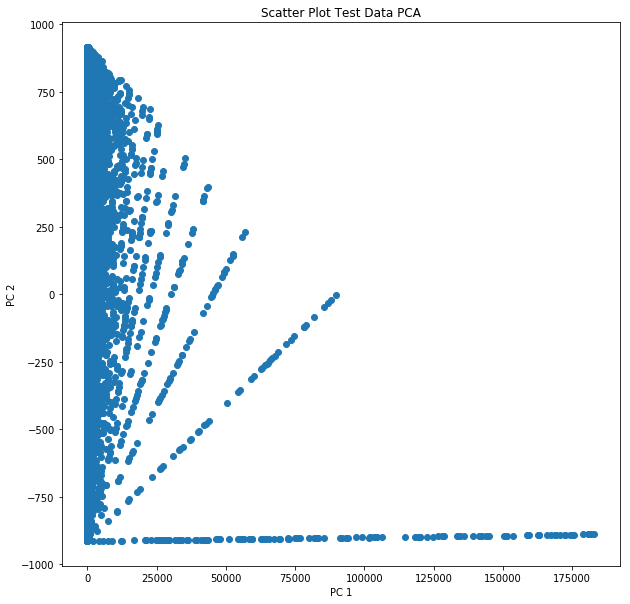

In [164]:
pl.figure('Scatter Plot Test Data PCA')
plt.scatter(Y_pca[:,0],Y_pca[:,1])
pl.xlabel("PC 1")
pl.ylabel("PC 2")
pl.title('Scatter Plot Test Data PCA')
plt.show()

In [165]:
pca_train = PCA(n_components=2)
Y_pca_train = pca_train.fit_transform(data_train)

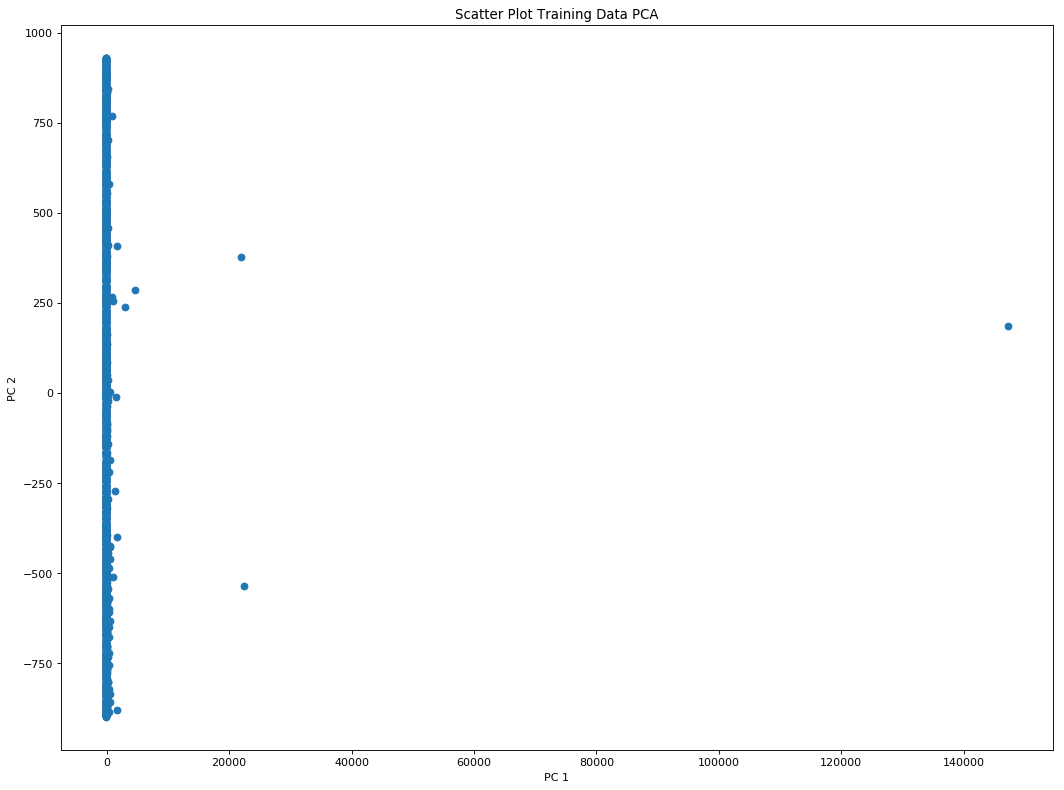

In [166]:
fig = plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Y_pca_train[:,0],Y_pca_train[:,1])
pl.xlabel("PC 1")
pl.ylabel("PC 2")
pl.title('Scatter Plot Training Data PCA')
plt.show()

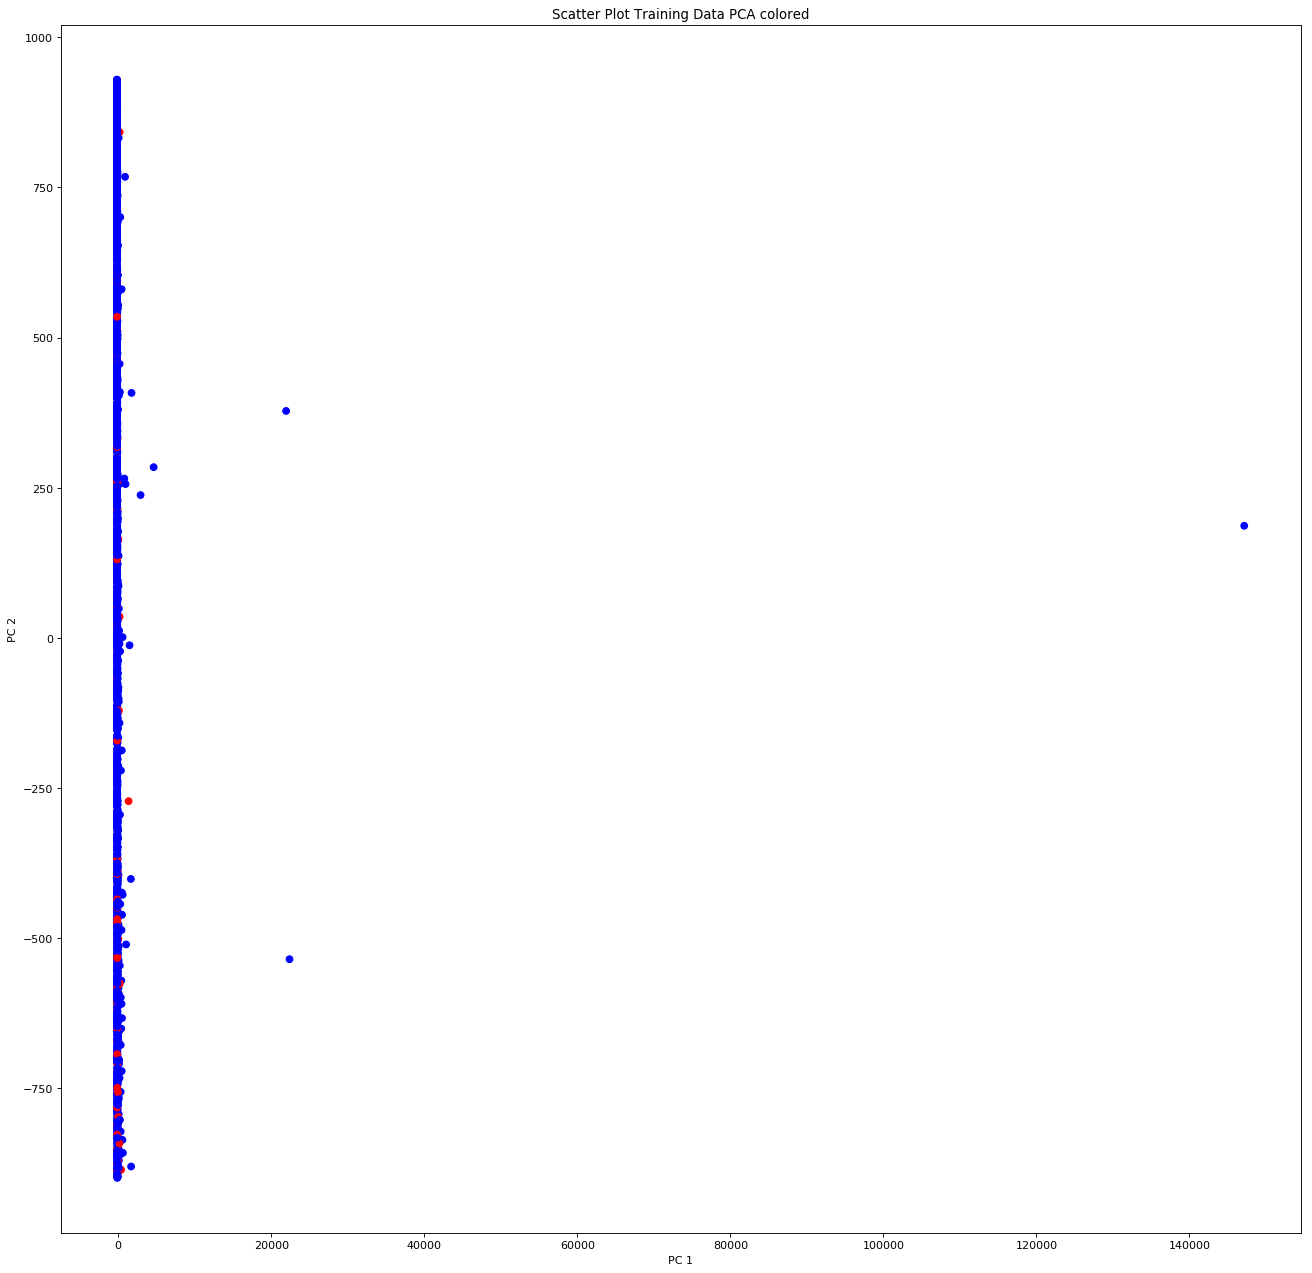

In [167]:
label=data_train['fraud']
colors=['blue','red']
#blue = not fraud
#red = fraud

fig = plt.figure(figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Y_pca_train[:,0],Y_pca_train[:,1],c=label, cmap=matplotlib.colors.ListedColormap(colors))
pl.xlabel("PC 1")
pl.ylabel("PC 2")
pl.title('Scatter Plot Training Data PCA colored')
plt.show()

# Plotting all features against each other colorcoded with clusters and form = label

Here I did not use the one-dimensional pca used by Thomas above, since I do not understand why that shold be useful. The different marker loop to indicate fraud, not fraud doesnt work yet...

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'totalScanTimeInMinutes',
       'scannedLineItems', 'pricePerScannedLineItem',
       'scansWithoutRegistrationPerScannedLineItem',
       'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond',
       'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond',
       'secondsPerEuro', 'lineItemVoidsPerEuro',
       'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro'],
      dtype='object')
trustLevel


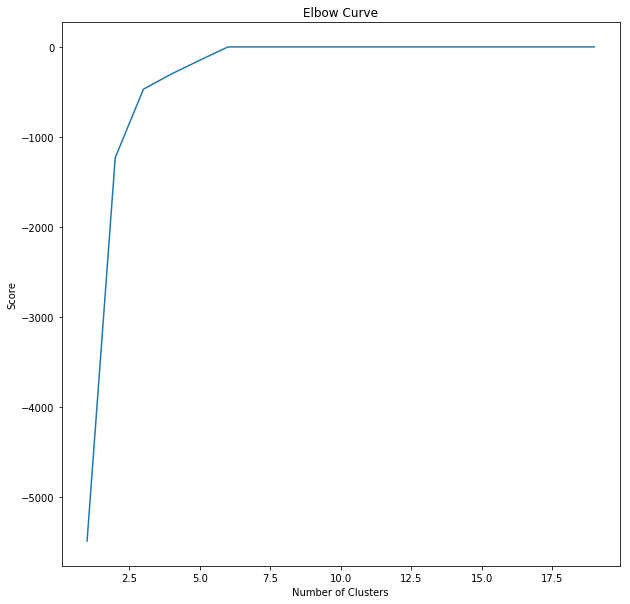

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x720 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [168]:
#CHOOSE ATTRIBUTES HERE
features = data_train.columns
print(features)

for feature in features:
    for feature2 in features:
        
        test =  {feature: 1, feature2: 2}
        s = '->'
        print(s.join(test))

        X = data_train[[feature]]
        Y = data_train[[feature2]]

        Nc = range(1, 20)
        kmeans = [KMeans(n_clusters=i) for i in Nc]
        kmeans
        score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
        score

        pl.plot(Nc,score)
        pl.xlabel('Number of Clusters')
        pl.ylabel('Score')
        pl.title('Elbow Curve')
        pl.show()

        kmeans=KMeans(n_clusters=3)
        kmeansoutput=kmeans.fit(Y)
        kmeansoutput
        
        m = ['o', 'x']

        pl.figure('3 Cluster K-Means')
        fig = plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
        for i in range(len(Y)):
            pl.scatter(X[:, 0], Y[:, 0], c=kmeansoutput.labels_, marker=m[i])
        pl.xlabel(feature)
        pl.ylabel(feature2)
        pl.title('3 Cluster K-Means')
        pl.show()


Scaling

In [169]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
data_test = pd.DataFrame(feature_scaler.fit_transform(data_test.values), columns=data_test.columns, index=data_test.index)
data_train = pd.DataFrame(feature_scaler.fit_transform(data_train.values), columns=data_train.columns, index=data_train.index)
#feature_scaler = StandardScaler()
#X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
#data_preparation = "StandardScaler"

#transformer = FunctionTransformer(np.log1p, validate=True)
#X_scaled = pd.DataFrame(transformer.transform(X), columns=X.columns, index=X.index)
#data_preparation = "LogScaler"

In [170]:
pca_train = PCA(n_components=7)
Y_pca_train = pca_train.fit_transform(data_train)


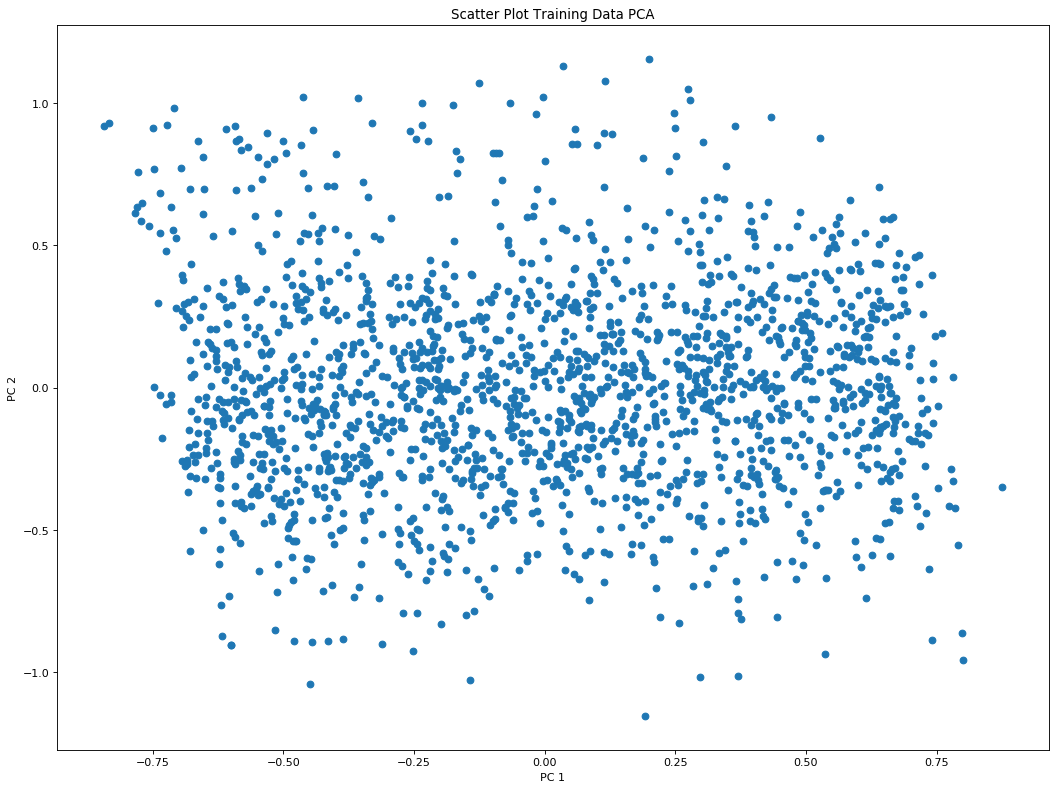

In [171]:
fig = plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Y_pca_train[:,0],Y_pca_train[:,1])
pl.xlabel("PC 1")
pl.ylabel("PC 2")
pl.title('Scatter Plot Training Data PCA')
plt.show()

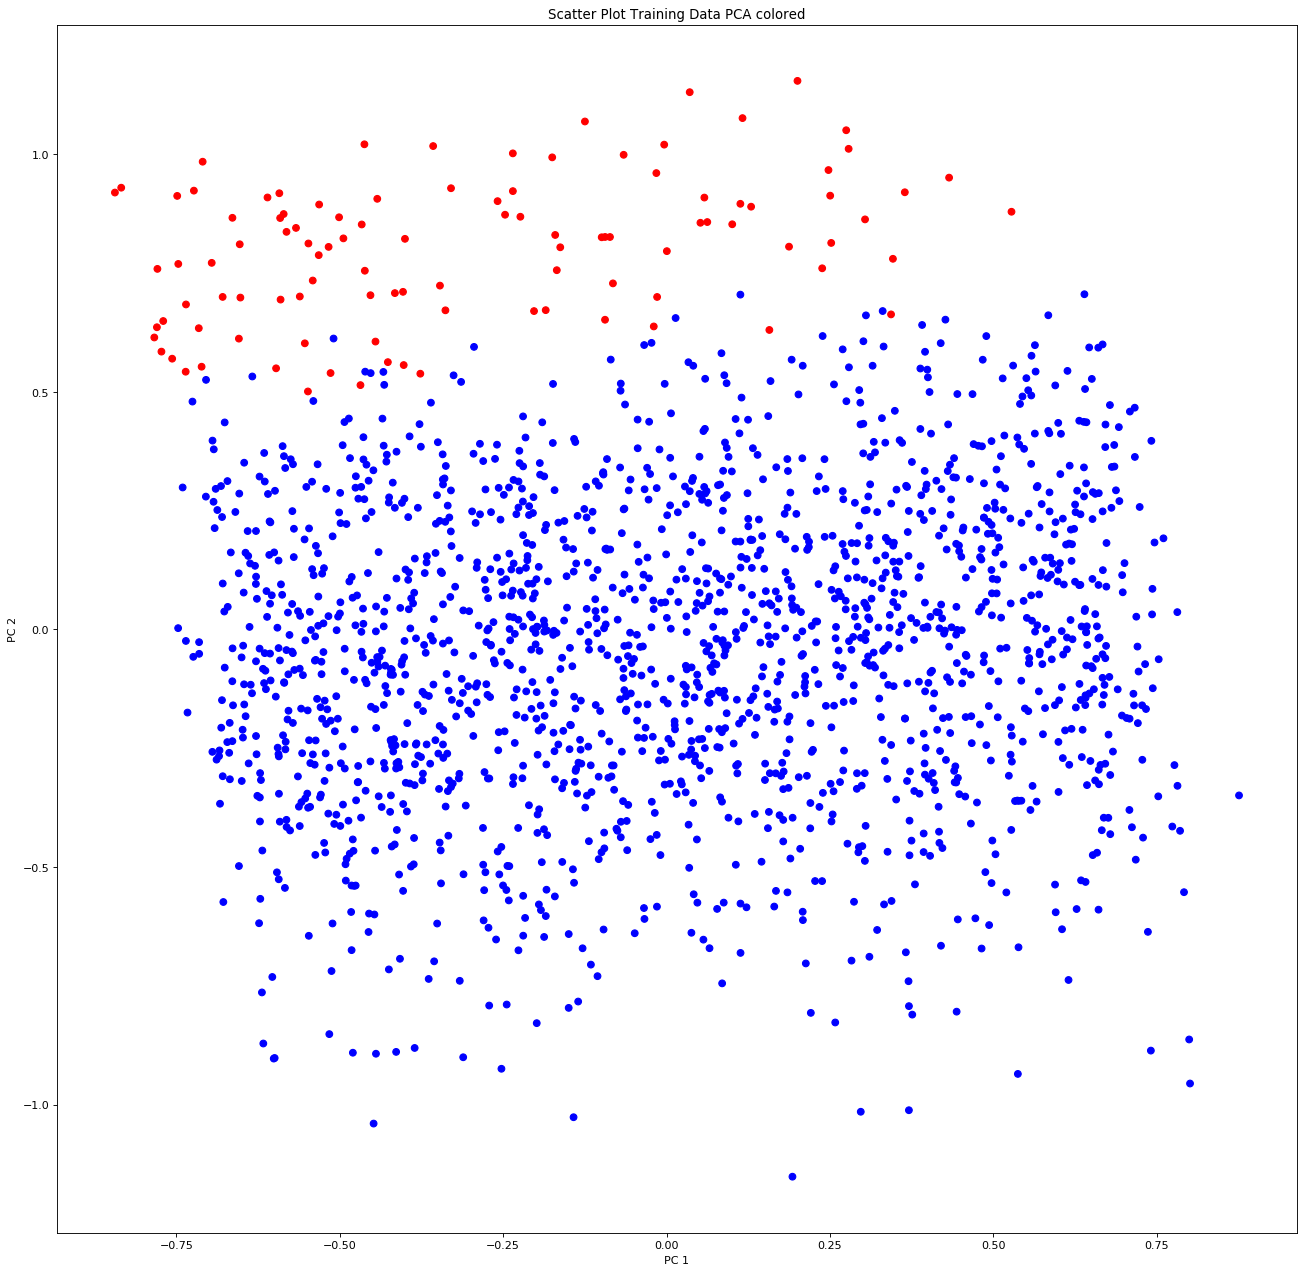

In [172]:
label=data_train['fraud']
colors=['blue','red']
#blue = not fraud
#red = fraud

fig = plt.figure(figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Y_pca_train[:,0],Y_pca_train[:,1],c=label, cmap=matplotlib.colors.ListedColormap(colors))
pl.xlabel("PC 1")
pl.ylabel("PC 2")
pl.title('Scatter Plot Training Data PCA colored')
plt.show()

462


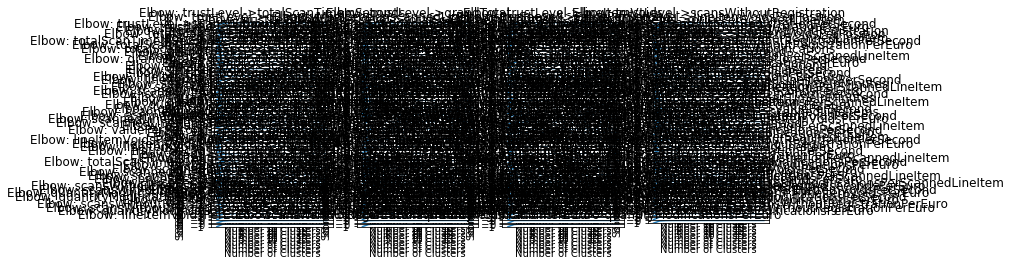

In [175]:
import itertools
#CHOOSE ATTRIBUTES HERE
features = data_train.columns
print(len(features)*len(features)-len(features))

count=0
plt.rcParams['figure.figsize'] = (10,10)
for feature in itertools.combinations(features, r=2):
    count+=1
    
    X = data_train[[feature[0]]]
    Y = data_train[[feature[1]]]
    
    
    ax2 = plt.subplot(154, 4, count)
    test =  {feature[0]: 1, feature[1]: 2}
    s = '->'
    plt.title('Elbow: '+s.join(test))

    #Calculate optimal number of clusters
    Nc = range(1, 20)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    kmeans
    score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
    score
    
    plt.plot(Nc,score)
    
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score') 
    plt.show();

In [201]:
#for feature in itertools.combinations(features, r=2):
test =  {feature[0]: 1, feature[1]: 2}
s = '->'
print(s.join(test))

ydata = data_train['fraud']
xdata = data_train.drop('fraud',axis=1)

kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(xdata)
y_kmeans = kmeans.predict(ydata)

plt.figure('3 Cluster K-Means')
plt.scatter(xdata, c=y_kmeans)
plt.xlabel("Feature")
plt.ylabel("Feature2")
plt.title('3 Cluster K-Means')
plt.show()

trustLevel->totalScanTimeInSeconds


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.